# Imports

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import scikitplot as skplt

from matplotlib.colors import ListedColormap

from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier #more ensemble methods to be tested
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

# Prepare data

## Photodiodes (2D)

In [2]:
df_2D = pd.read_csv(r'fdir-algorithm/data/webmust_labeled/labeled_I_PD_THETA.csv')
#df_2D = pd.read_csv(r'fdir-algorithm/data/webmust_labeled/perfect_training_set.csv')

df_2D = df_2D.dropna()
df_2D = df_2D[(df_2D.PD3 > 0) & (df_2D.PD6 > 0)]

tr_input_2D = np.array([df_2D.PD6,df_2D.PD3])
tr_input_2D = np.transpose(tr_input_2D)

label_2D = df_2D.OPTICAL_RX_STATE
tr_output_2D = np.array(label_2D)

print("{} samples labeled for {}".format(tr_input_2D.shape[0], label_2D.name))

10106 samples labeled for OPTICAL_RX_STATE


## Euler angles (3D)

In [3]:
df = pd.read_csv(r'fdir-algorithm/data/webmust_labeled/labeled_O_Q_FB_FI_EST.csv')

tr_input_3D = np.array([df.x_euler, df.y_euler, df.z_euler])
tr_input_3D = np.transpose(tr_input_3D)

label_3D = df.OPTICAL_RX_STATE
tr_output_3D = np.array(label_3D)

print("{} samples labeled for {}".format(tr_input_3D.shape[0], label_3D.name))

4776 samples labeled for OPTICAL_RX_STATE


## Quaternions (4D)

In [4]:
tr_input_4D = np.array([df.w, df.x, df.y, df.z])
tr_input_4D = np.transpose(tr_input_4D)


label_4D = df.OPTICAL_RX_STATE
tr_output_4D = np.array(label_4D)

print("{} samples labeled for {}".format(tr_input_4D.shape[0], label_4D.name))

4776 samples labeled for OPTICAL_RX_STATE


# Train models

In [5]:
# Chosen models
models_labels = ['KNN','Gaussian NB', 'Lin. Discr. Analysis', 'SVC','Logistic Regression', 'Random Forest Class.', 'MLP']

# Split data
X_2D = tr_input_2D
Y_2D = tr_output_2D
X_3D = tr_input_3D
Y_3D = tr_output_3D
X_4D = tr_input_4D
Y_4D = tr_output_4D

test_size=0.20
shuffle_seed=42
X_train_2D, X_test_2D, Y_train_2D, Y_test_2D = train_test_split(X_2D, Y_2D, test_size=test_size, random_state=shuffle_seed)
X_train_3D, X_test_3D, Y_train_3D, Y_test_3D = train_test_split(X_3D, Y_3D, test_size=test_size, random_state=shuffle_seed)
X_train_4D, X_test_4D, Y_train_4D, Y_test_4D = train_test_split(X_4D, Y_4D, test_size=test_size, random_state=shuffle_seed)

## Photodiodes (2D)

In [6]:
# 2D models
models = [KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=10, p=2),
          GaussianNB(),
          LinearDiscriminantAnalysis(solver='lsqr'), 
          svm.SVC(kernel='linear'), #for kernel = 'rbf', play with gamma and c
          LogisticRegression(),
          RandomForestClassifier(n_estimators=5, max_depth=8, random_state=1),
          MLPClassifier(hidden_layer_sizes=120, activation='tanh', solver='adam', learning_rate='adaptive')]

trained_models_2D = []
for model in models:
    print(".",end='')
    trained_models_2D.append(model.fit(X_train_2D, Y_train_2D))
    
print("\n2D models trained")

.......
2D models trained


## Euler angles (3D)

In [7]:
# 3D models
models = [KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=10, p=2),
          GaussianNB(),
          LinearDiscriminantAnalysis(solver='lsqr'), 
          svm.SVC(kernel='rbf', gamma="scale"),
          LogisticRegression(),
          ExtraTreesClassifier(),#RandomForestClassifier(),
          MLPClassifier(hidden_layer_sizes=120, activation='tanh', solver='adam', learning_rate='adaptive')]

trained_models_3D = []
for model in models:
    print(".",end='')
    trained_models_3D.append(model.fit(X_train_3D, Y_train_3D))
    
print("\n3D models trained")

.......
3D models trained


/home/tanguy/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Quaternions (4D)

In [8]:
# 4D models
models = [KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=10, p=2),
          GaussianNB(),
          LinearDiscriminantAnalysis(solver='lsqr'), 
          svm.SVC(kernel='rbf'), #for kernel = 'rbf', play with gamma and c
          LogisticRegression(),
          RandomForestClassifier(max_depth=10),
          MLPClassifier(hidden_layer_sizes=120, activation='tanh', solver='adam', learning_rate='adaptive')]

trained_models_4D = []
for model in models:
    print(".",end='')
    trained_models_4D.append(model.fit(X_train_4D, Y_train_4D))

print("\n4D models trained")

.......
4D models trained


/home/tanguy/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Display stuff

## Decisions regions (2D)

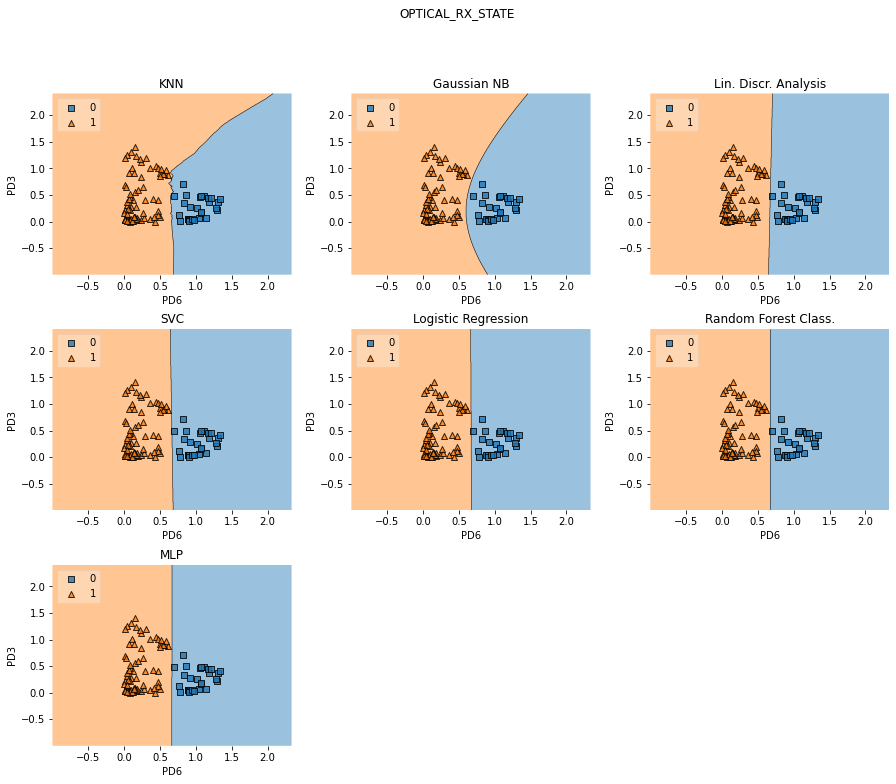

In [9]:
models_grid_pos = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0)]
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.25, hspace=0.3)

fig = plt.figure(figsize=(15,12))
fig.suptitle(label_2D.name)

nb_samples = min(100, len(X_test_2D))

for model, model_grid_pos, model_label in zip(trained_models_2D, models_grid_pos, models_labels):
    ax = plt.subplot(gs[model_grid_pos[0], model_grid_pos[1]])
    ax.set_xlabel("PD6")
    ax.set_ylabel("PD3")
    fig = plot_decision_regions(X=X_test_2D[:nb_samples], y=Y_test_2D[:nb_samples], clf=model, legend=2)
    plt.title(model_label)

plt.show()

## Euler angles input (3D)

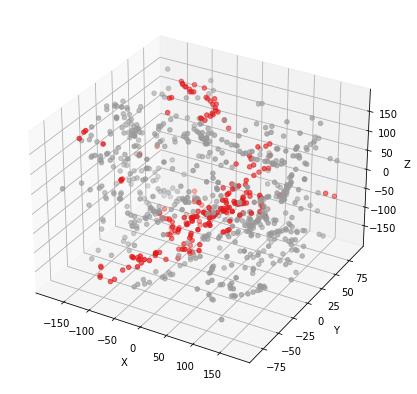

In [21]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
nb_samples = min(800, len(Y_test_3D))
ax.scatter3D(X_test_3D[:nb_samples,0], X_test_3D[:nb_samples,1], X_test_3D[:nb_samples,2], c=Y_test_3D[:nb_samples], cmap="Set1")

# Evaluate

## Photodiodes (2D)

In [11]:
print("-- Accuracies (2D models) --")
for index, f in enumerate(trained_models_2D):
    prediction = f.predict(X_test_2D)
    print("{}:\t{}".format(models_labels[index], accuracy_score(prediction,Y_test_2D)).expandtabs(23))

-- Accuracies (2D models) --
KNN:                   0.9980217606330366
Gaussian NB:           0.9826904055390703
Lin. Discr. Analysis:  0.9985163204747775
SVC:                   0.9985163204747775
Logistic Regression:   0.9985163204747775
Random Forest Class.:  1.0
MLP:                   0.9990108803165183


## Euler angles (3D)

In [12]:
print("-- Accuracies (3D models) --")
for index, f in enumerate(trained_models_3D):
    prediction = f.predict(X_test_3D)
    print("{}:\t{}".format(models_labels[index], accuracy_score(prediction,Y_test_3D)).expandtabs(23))

-- Accuracies (3D models) --
KNN:                   0.9476987447698745
Gaussian NB:           0.7656903765690377
Lin. Discr. Analysis:  0.7615062761506276
SVC:                   0.9006276150627615
Logistic Regression:   0.7615062761506276
Random Forest Class.:  0.9592050209205021
MLP:                   0.9173640167364017


## Quaternions (4D)

In [13]:
print("-- Accuracies (4D models) --")
for index, f in enumerate(trained_models_4D):
    prediction = f.predict(X_test_4D)
    print("{}:\t{}".format(models_labels[index], accuracy_score(prediction,Y_test_4D)).expandtabs(23))

-- Accuracies (4D models) --
KNN:                   0.950836820083682
Gaussian NB:           0.7510460251046025
Lin. Discr. Analysis:  0.7615062761506276
SVC:                   0.9414225941422594
Logistic Regression:   0.7615062761506276
Random Forest Class.:  0.9696652719665272
MLP:                   0.9393305439330544
